# 🖼️ Part 8: Seaborn Layouts and Figure-level Plots (Mapping from Matplotlib Part 3)

**Goal:** Understand Seaborn's two layout philosophies: 
1.  Using **Axes-level** functions (e.g., `sns.histplot`) on Matplotlib grids created with `plt.subplots()` and `plt.subplot2grid`.
2.  Using **Figure-level** functions (e.g., `sns.displot`, `sns.catplot`) to automatically generate subplot grids based on data categories.

---

### Key Learning Objectives
1.  Use `fig, axes = plt.subplots()` to create a grid for Seaborn **Axes-level** functions.
2.  Design **unequal layouts** using `plt.subplot2grid` and plot Seaborn graphs onto them.
3.  Introduce **Figure-level functions** (`sns.catplot`, `sns.displot`) as the "Seaborn-native" alternative for creating multi-panel dashboards automatically.

---

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib # Keep for version checking if desired

# Set Matplotlib style for a clean look
plt.style.use('ggplot') 
# Set a valid Seaborn theme
sns.set_theme(style="ticks") 

print("🎯 Creating your first subplots with Seaborn and pandas data...")

# Create comprehensive Titanic dataset (local sample data)
titanic_data = pd.DataFrame({
    'Age': [22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, 2, 
             31, 25, 8, 19, 40, 66, 28, 42, 21, 18, 14, 40, 27, 3, 45, 33],
    'Fare': [7.25, 71.28, 7.92, 53.10, 8.05, 51.86, 21.08, 11.13, 30.07, 16.70,
             26.55, 8.05, 31.0, 7.85, 16.0, 29.12, 26.0, 7.90, 21.08, 7.25,
             227.52, 10.5, 26.0, 13.0, 7.74, 7.05, 46.90, 26.55, 7.23, 21.08, 26.25, 7.75],
    'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 
             'male', 'female', 'female', 'male', 'male', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'male',
             'male', 'female', 'male', 'female'],
    'Pclass': [3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3,
                1, 2, 2, 3, 3, 3, 1, 1, 3, 3, 2, 3],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
                  1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1]
})

🎯 Creating your first subplots with Seaborn and pandas data...


## 1. The Object-Oriented (OO) Method: `plt.subplots`

This is the standard way to create grids when using Seaborn's **Axes-level** functions (like `sns.histplot`, `sns.barplot`, `sns.scatterplot`).

1.  Create the grid of axes using `fig, axes = plt.subplots()`.
2.  Tell each Seaborn function which axes to draw on using the `ax=` parameter.

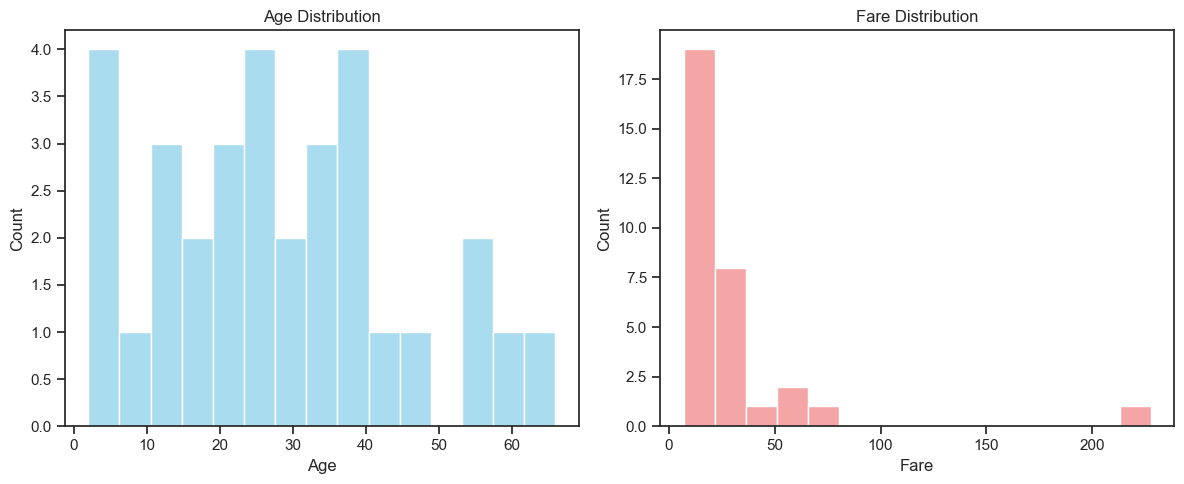

✅ Created side-by-side subplots with sns.histplot on Matplotlib axes.


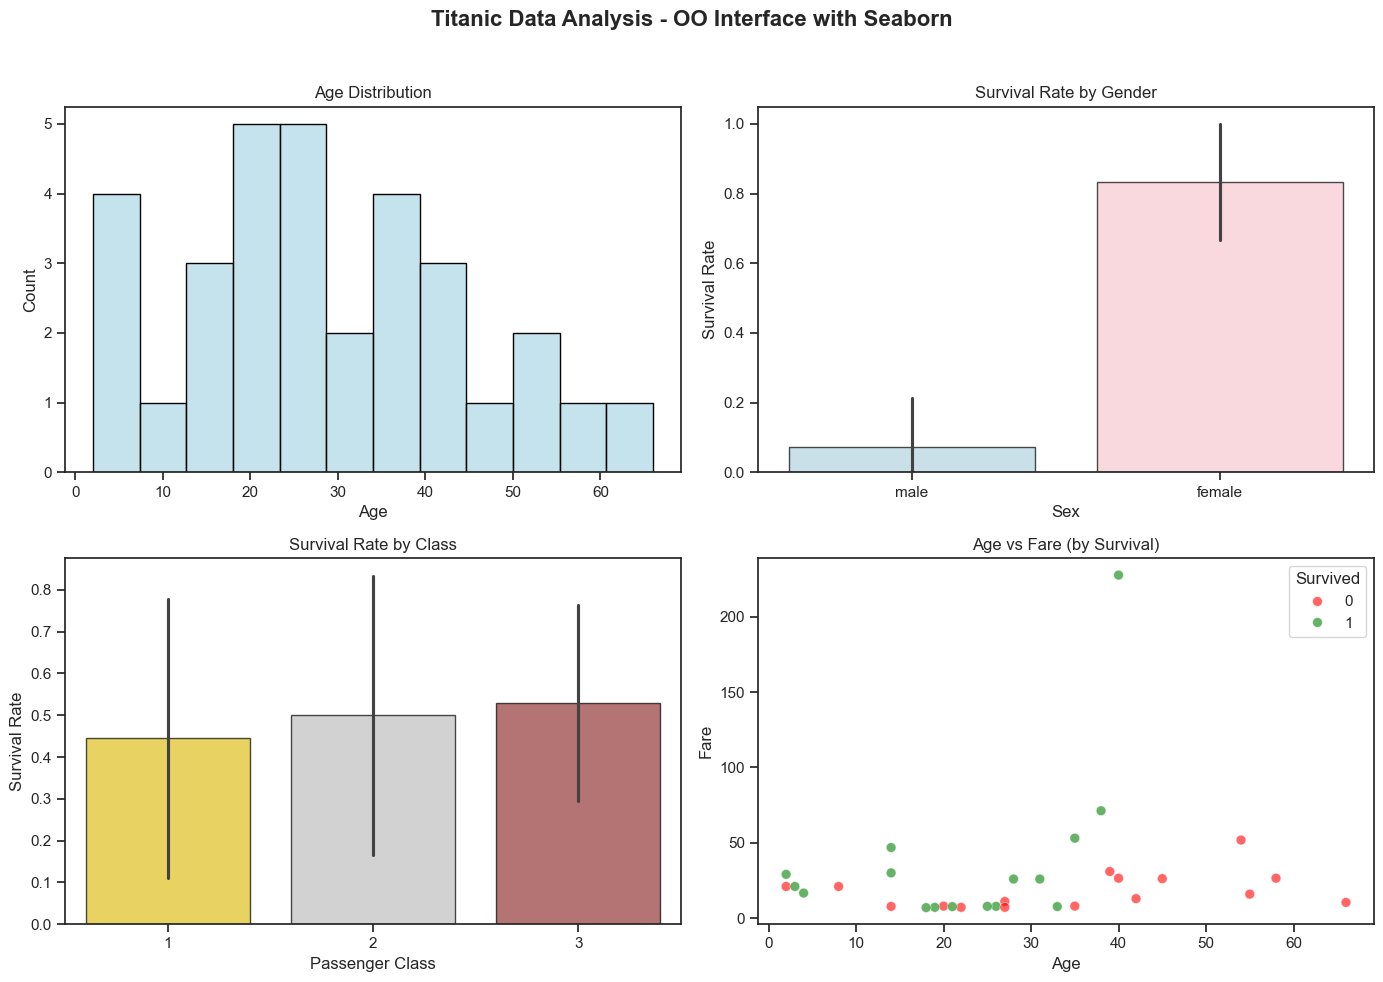


🎉 OO Interface Benefits: You can mix and match different Seaborn plot types on the same grid.


In [9]:
# Method 1: 1x2 Grid using OO Interface
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

sns.histplot(data=titanic_data, x='Age', bins=15, color='skyblue', alpha=0.7, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(data=titanic_data, x='Fare', bins=15, color='lightcoral', alpha=0.7, ax=axes[1])
axes[1].set_title('Fare Distribution')

plt.tight_layout()
plt.show()

print("✅ Created side-by-side subplots with sns.histplot on Matplotlib axes.")


# Method 2: 2x2 Grid using OO Interface
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Titanic Data Analysis - OO Interface with Seaborn', fontsize=16, fontweight='bold')

# Top left: Age histogram (axes[0, 0])
sns.histplot(data=titanic_data, x='Age', bins=12, color='lightblue', alpha=0.7, edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_ylabel('Count')

# Top right: Survival by gender (axes[0, 1]) - FIXED for FutureWarning
sns.barplot(data=titanic_data, x='Sex', y='Survived', 
            hue='Sex', # Set hue to the x-variable
            palette=['lightblue', 'pink'], 
            alpha=0.7, edgecolor='black', ax=axes[0, 1], 
            legend=False) # Disable the redundant legend
axes[0, 1].set_title('Survival Rate by Gender')
axes[0, 1].set_ylabel('Survival Rate')

# Bottom left: Class survival rates (axes[1, 0]) - FIXED for FutureWarning
sns.barplot(data=titanic_data, x='Pclass', y='Survived', 
            hue='Pclass', # Set hue to the x-variable
            palette=['gold', 'silver', 'brown'], 
            alpha=0.7, edgecolor='black', ax=axes[1, 0], 
            legend=False) # Disable the redundant legend
axes[1, 0].set_title('Survival Rate by Class')
axes[1, 0].set_ylabel('Survival Rate')
axes[1, 0].set_xlabel('Passenger Class')

# Bottom right: Age vs Fare colored by survival (axes[1, 1])
# This was already correct as `hue` was properly defined
sns.scatterplot(data=titanic_data, x='Age', y='Fare', hue='Survived', palette={0:'red', 1:'green'}, alpha=0.6, s=50, ax=axes[1, 1])
axes[1, 1].set_title('Age vs Fare (by Survival)')

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for suptitle
plt.show()

print("\n🎉 OO Interface Benefits: You can mix and match different Seaborn plot types on the same grid.")

## 2. Advanced Manual Layouts (`subplot2grid`)

Matplotlib's `plt.subplot2grid` is also fully compatible with Seaborn's Axes-level functions. This allows you to create complex, unequal dashboard layouts.

🎯 Creating advanced subplot layouts (Unequal sizes) with Seaborn...


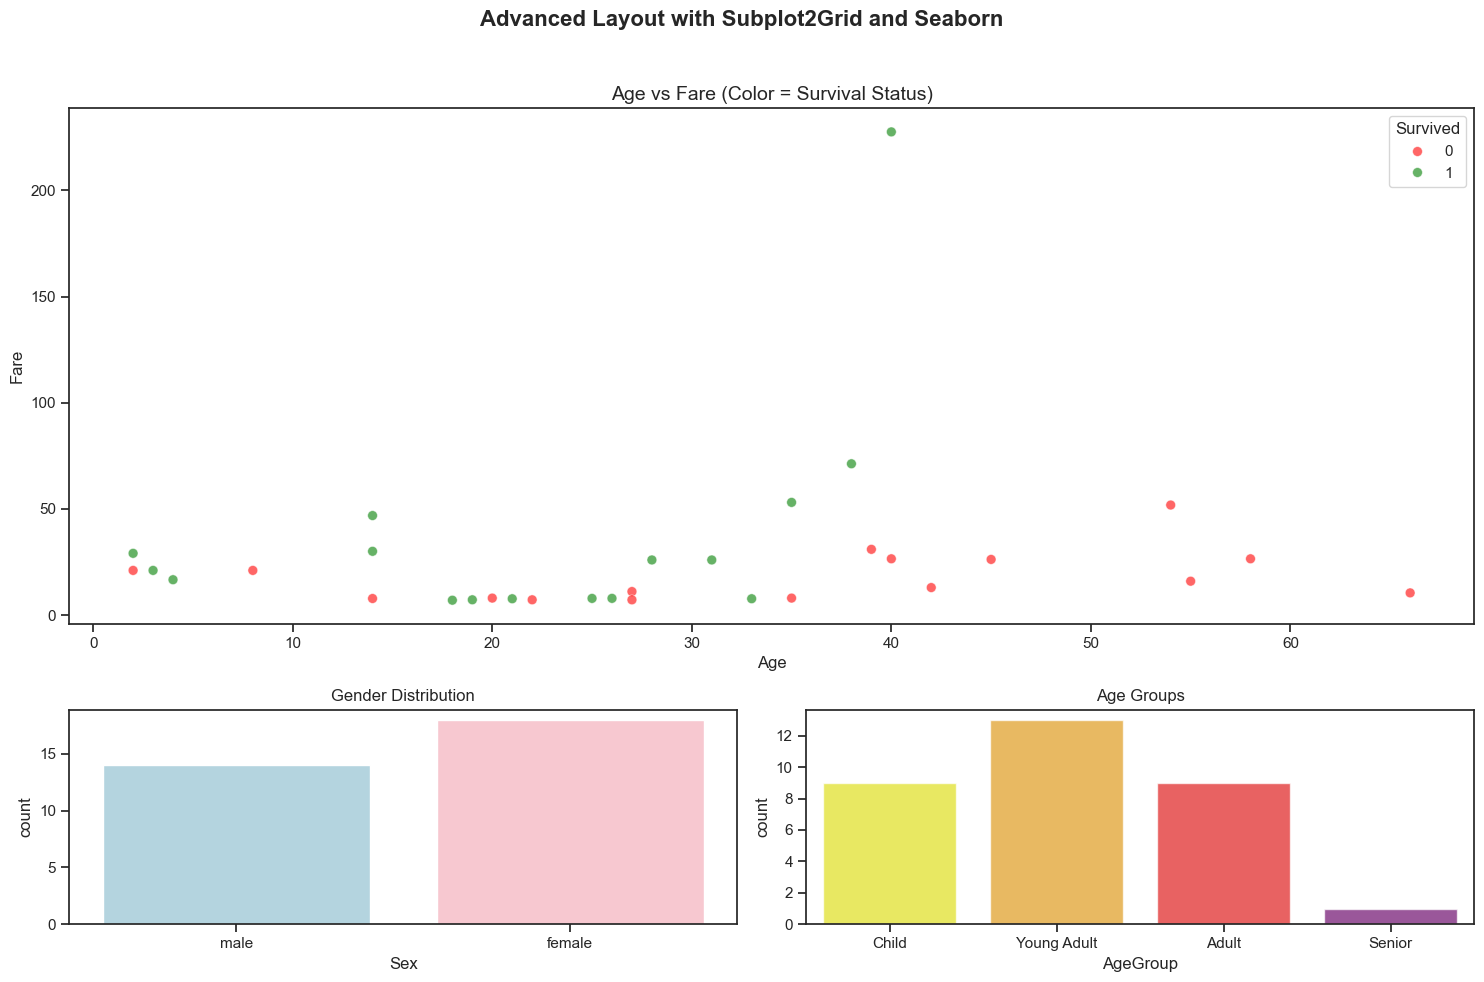


📊 Advanced layout features: subplot2grid() works perfectly by passing the 'ax' to Seaborn.


In [10]:
print("🎯 Creating advanced subplot layouts (Unequal sizes) with Seaborn...")

fig = plt.figure(figsize=(15, 10))
fig.suptitle('Advanced Layout with Subplot2Grid and Seaborn', fontsize=16, fontweight='bold')

# ax1: Large plot (spans 2 columns and 2 rows)
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2, rowspan=2)
sns.scatterplot(data=titanic_data, x='Age', y='Fare', hue='Survived', 
                palette={0:'red', 1:'green'}, alpha=0.6, s=50, ax=ax1)
ax1.set_title('Age vs Fare (Color = Survival Status)', fontsize=14)

# ax2: Small plot bottom left - FIXED NameError
# We define ax2 *before* plotting on it
ax2 = plt.subplot2grid((3, 2), (2, 0)) 
sns.countplot(data=titanic_data, x='Sex', 
              hue='Sex', # Fixed for FutureWarning
              palette=['lightblue', 'pink'],
              ax=ax2, 
              legend=False) # Fixed for FutureWarning
ax2.set_title('Gender Distribution')

# ax3: Small plot bottom right - FIXED NameError
# We define ax3 *before* plotting on it
ax3 = plt.subplot2grid((3, 2), (2, 1)) 
age_groups = pd.cut(titanic_data['Age'], bins=[0, 18, 35, 60, 100], 
                    labels=['Child', 'Young Adult', 'Adult', 'Senior'])
# We add this new column to the DataFrame for Seaborn to use
titanic_data['AgeGroup'] = age_groups
sns.countplot(data=titanic_data, x='AgeGroup', 
              hue='AgeGroup', # Fixed for FutureWarning
              palette=['yellow', 'orange', 'red', 'purple'], 
              alpha=0.7, ax=ax3, 
              legend=False) # Fixed for FutureWarning
ax3.set_title('Age Groups')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\n📊 Advanced layout features: subplot2grid() works perfectly by passing the 'ax' to Seaborn.")

## 3. Practice Project: Comprehensive Dashboard (Seaborn Axes-level)

Combining all concepts using `subplot2grid` and various Seaborn plot types.

🎯 PRACTICE PROJECT: Complete Titanic Analysis Dashboard (Seaborn)

💾 Dashboard saved as 'seaborn_part8_subplot_dashboard.png'


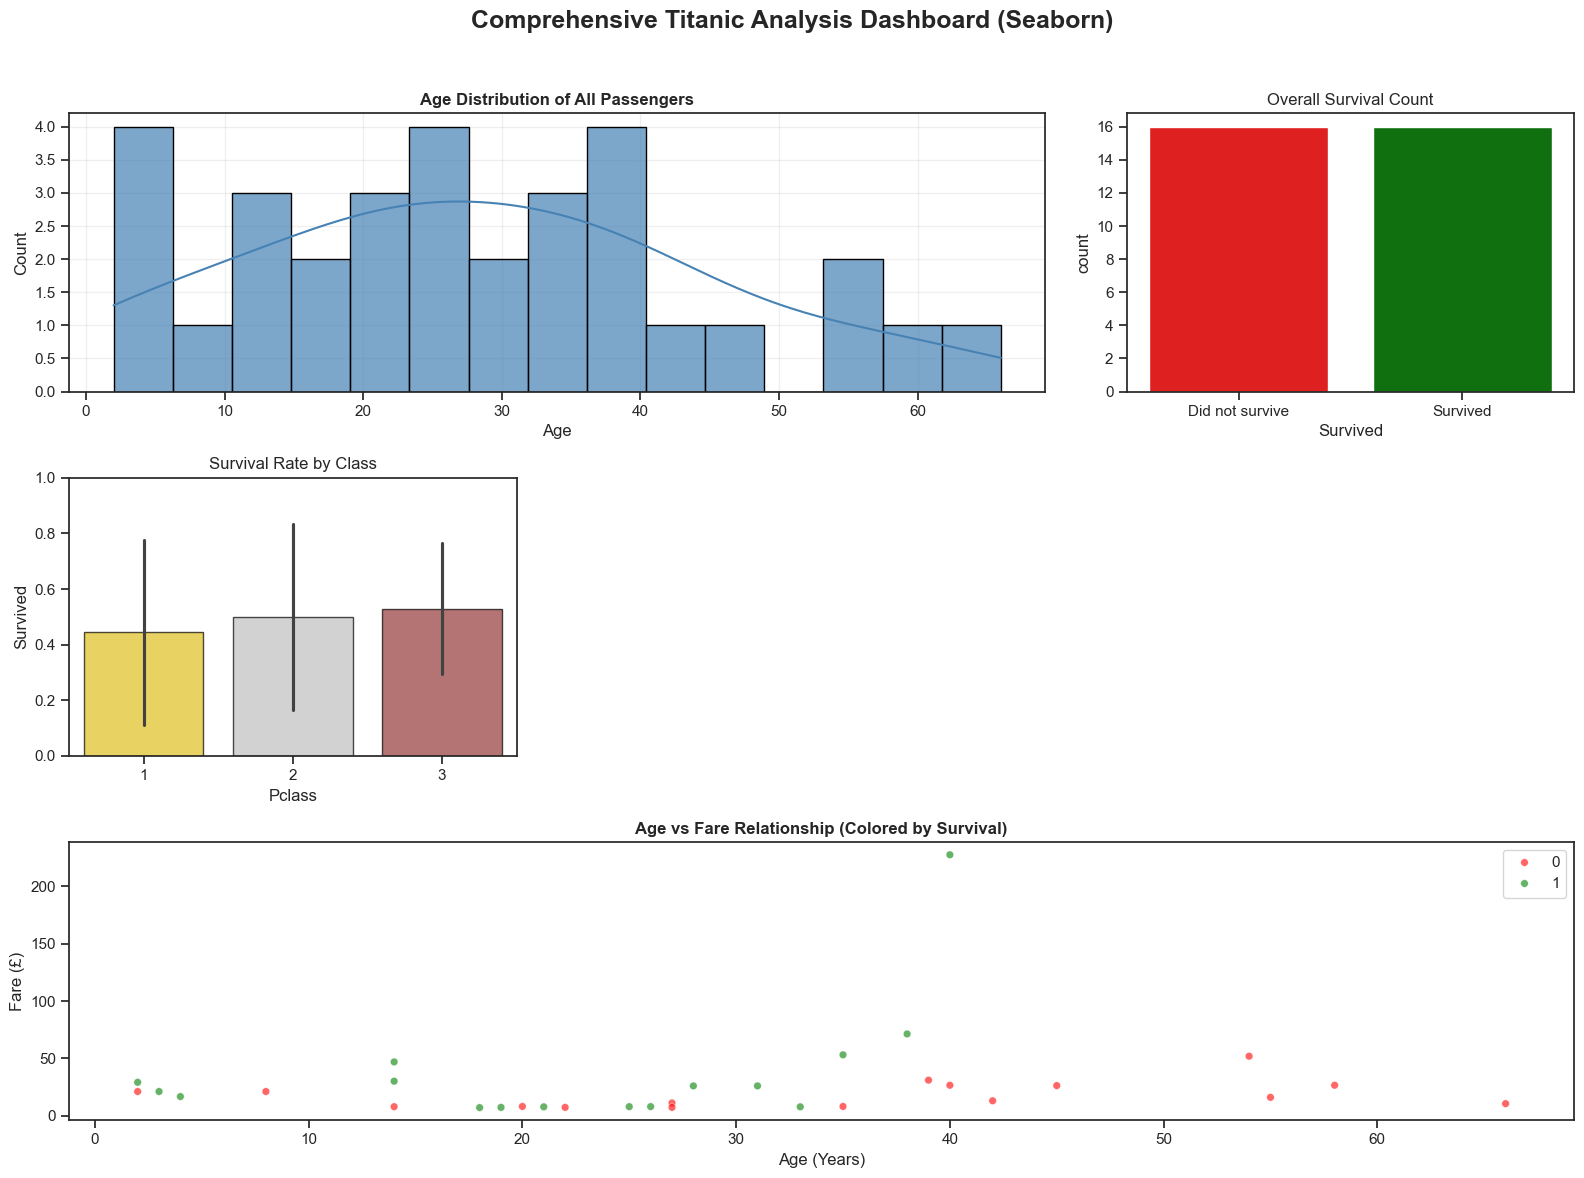


🎯 Part 8, Section 3 complete! We have replicated the Matplotlib dashboard using Seaborn's axes-level plots.


In [11]:
print("🎯 PRACTICE PROJECT: Complete Titanic Analysis Dashboard (Seaborn)")

fig = plt.figure(figsize=(16, 12))
fig.suptitle('Comprehensive Titanic Analysis Dashboard (Seaborn)', fontsize=18, fontweight='bold')

# Plot 1: Age Distribution (top left, large)
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
sns.histplot(data=titanic_data, x='Age', bins=15, color='steelblue', alpha=0.7, edgecolor='black', ax=ax1, kde=True)
ax1.set_title('Age Distribution of All Passengers', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Survival Count (top right) - FIXED UserWarning
ax2 = plt.subplot2grid((3, 3), (0, 2))
sns.countplot(data=titanic_data, x='Survived', 
              hue='Survived', # Fixed for FutureWarning
              palette={0:'red', 1:'green'}, 
              ax=ax2, 
              legend=False) # Fixed for FutureWarning
ax2.set_title('Overall Survival Count')
ax2.set_xticks([0, 1]) # <-- FIX: Set tick positions
ax2.set_xticklabels(['Did not survive', 'Survived']) # Now set labels

# Plot 3: Survival by class (middle left) - FIXED for FutureWarning
ax3 = plt.subplot2grid((3, 3), (1, 0))
sns.barplot(data=titanic_data, x='Pclass', y='Survived', 
            hue='Pclass', # Fixed for FutureWarning
            palette=['gold', 'silver', 'brown'], 
            alpha=0.7, edgecolor='black', ax=ax3, 
            legend=False) # Fixed for FutureWarning
ax3.set_title('Survival Rate by Class')
ax3.set_ylim(0, 1)

# Plot 6: Age vs Fare scatter (bottom, spanning all columns)
ax6 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
sns.scatterplot(data=titanic_data, x='Age', y='Fare', hue='Survived', 
                palette={0:'red', 1:'green'}, alpha=0.6, s=30, ax=ax6)
ax6.set_title('Age vs Fare Relationship (Colored by Survival)', fontweight='bold')
ax6.set_xlabel('Age (Years)')
ax6.set_ylabel('Fare (£)')
ax6.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the figure BEFORE plt.show()
plt.savefig('seaborn_part8_subplot_dashboard.png', dpi=300, bbox_inches='tight')
print("\n💾 Dashboard saved as 'seaborn_part8_subplot_dashboard.png'")

plt.show()

print("\n🎯 Part 8, Section 3 complete! We have replicated the Matplotlib dashboard using Seaborn's axes-level plots.")

## 4. The "Seaborn-native" Approach: Figure-level Functions

The previous examples used Matplotlib to create the layout, then placed Seaborn plots on it. This is great for custom, complex dashboards.

However, Seaborn's main power comes from **Figure-level functions** (`displot`, `catplot`, `relplot`). These functions create the subplot grid *for you* based on your data's categories, using the `col` and `row` parameters.

This is a different way of thinking: instead of "create an empty 2x2 grid," you say "show me the Age distribution, split by 'Sex' in columns."

🎯 The Seaborn-native approach: Figure-level functions...


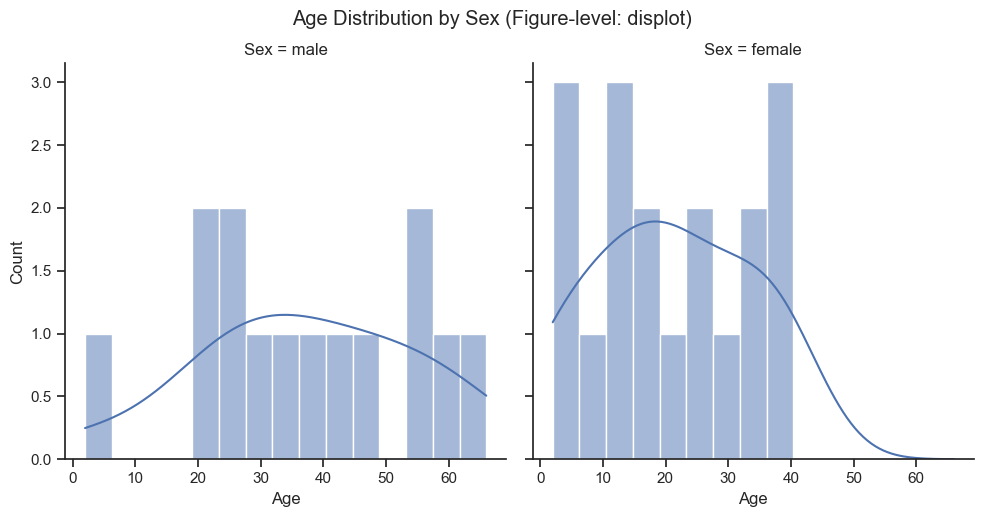

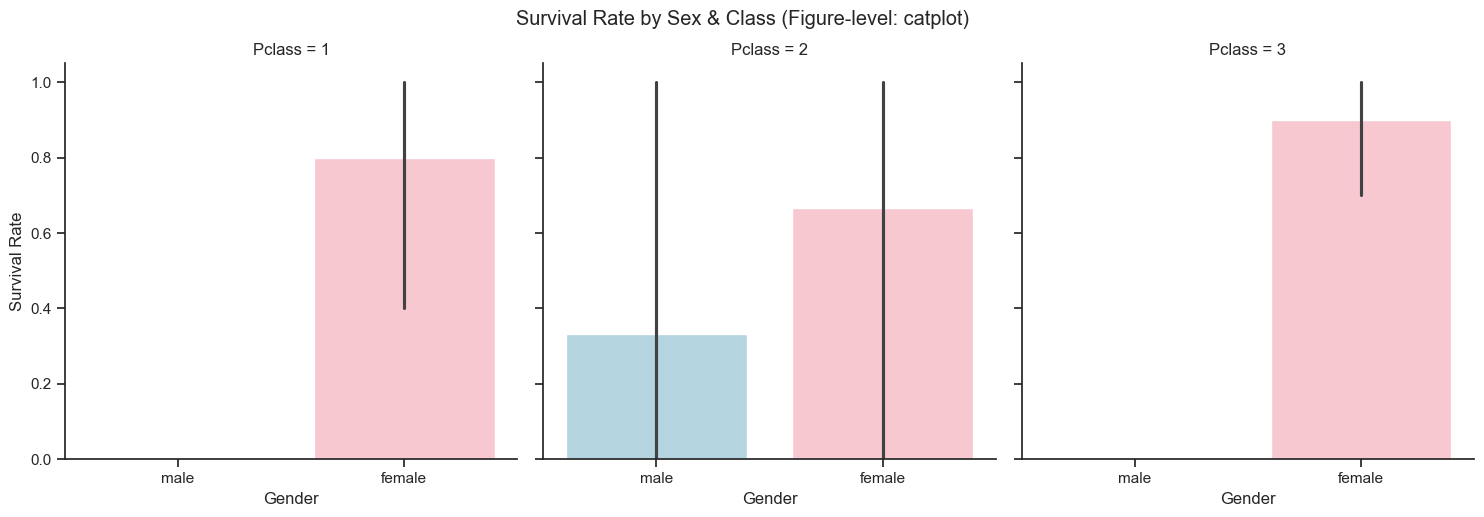


🎉 Notice how Seaborn's Figure-level functions create the subplots automatically based on data!


In [12]:
print("🎯 The Seaborn-native approach: Figure-level functions...")

# 1. Distribution Plot (replaces a manual 1x2 subplot)
# Show Age distribution, with one column for 'male' and one for 'female'
g = sns.displot(
    data=titanic_data, 
    x='Age', 
    col='Sex',  # Creates subplots based on columns in the 'Sex' variable
    kde=True,
    bins=15
)
g.fig.suptitle('Age Distribution by Sex (Figure-level: displot)', y=1.03)
plt.show()


# 2. Categorical Plot (replaces a manual 1x3 subplot) - FIXED for FutureWarning
# Show Survival Rate, with one column for each 'Pclass'
g = sns.catplot(
    data=titanic_data,
    x='Sex',
    y='Survived',
    col='Pclass', # Creates 3 subplots, one for each class
    kind='bar',   # Specifies the plot type
    hue='Sex',    # Added hue='Sex'
    palette=['lightblue', 'pink'], # Palette now corresponds to hue
    legend=False  # Added legend=False
)
g.fig.suptitle('Survival Rate by Sex & Class (Figure-level: catplot)', y=1.03)
g.set_axis_labels("Gender", "Survival Rate")
plt.show()


print("\n🎉 Notice how Seaborn's Figure-level functions create the subplots automatically based on data!")

---

**Summary:**

* **Method 1 (Flexibility):** Use `plt.subplots()` or `plt.subplot2grid()` to create any layout you want. Then, use Seaborn's **Axes-level** functions (like `sns.histplot`, `sns.barplot`, `sns.scatterplot`) and pass the `ax=` parameter to plot on specific axes. This is best for complex, non-uniform dashboards.
* **Method 2 (Speed & Simplicity):** Use Seaborn's **Figure-level** functions (like `sns.displot`, `sns.catplot`, `sns.relplot`). Use the `col`, `row`, and `hue` parameters to have Seaborn automatically create a uniform grid of plots that compares different facets of your data.